In [28]:
# Getting Python ready
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap
#%matplotlib widget

We want to perform an experiment that has a certain number of independent trials (repeats) of tossing a coin. 

We don't toss a real coin, just use a function that comes close to simulating a coin

    aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0])

The first argument is a random number Generator that enables simulations requiring generation of random outcomes. The rest of the arguments should be self-explanatory. We have the Bernoulli parameter (the probability p of heads/ the event of interest), the number of repeats of an experiment, and the number of trials (number of coin tosses) in an experiment.

In [44]:
def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):
    
    repeatIndex = 0
    observation = np.ones([numRepeatsOfExp, numTrialsInAnExp]) * -1
    #print(observation)
    while (repeatIndex < numRepeatsOfExp):
        observation[repeatIndex,:] = randomNumGen.random((1, numTrialsInAnExp))
        #index_ge1 = np.greater_equal(observation[repeatIndex,:], bernoulliParam_p)
        index_ge1 = np.less_equal(observation[repeatIndex,:], bernoulliParam_p)
        
        #print(observation[repeatIndex,:])
        #print(index_ge1)

        observation[repeatIndex,index_ge1] = profitLoss[0]
        observation[repeatIndex, np.invert(index_ge1)] = profitLoss[1]

        #print(observation[repeatIndex,:])

        #print(np.sum(observation[repeatIndex,:])/numTrialsInAnExp)
        repeatIndex = repeatIndex + 1
    return observation

Frequentist performs an experiment that has two independent trials (repeats) of tossing a coin. We have two independent Bernoulli trials.
The outcome of the first trial is observation[1,1]
The outcome of the second trial is observation[1,2]

In [45]:
v_numTrialsInAnExp = 1

observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=0.5, numRepeatsOfExp = 10, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[10,-10])



[0.62296283]
[False]
[-10.]
[0.97081718]
[False]
[-10.]
[0.27407576]
[ True]
[10.]
[0.15770098]
[ True]
[10.]
[0.63141339]
[False]
[-10.]
[0.6139314]
[False]
[-10.]
[0.11912746]
[ True]
[10.]
[0.77044445]
[False]
[-10.]
[0.70693263]
[False]
[-10.]
[0.14213251]
[ True]
[10.]


('The array of observations (1 row per experiment repeat):', array([[ 10.,  10., -10., ..., -10., -10.,  10.]]))
('Frequency of ones  (1 row per experiment repeat):', array([-0.014]))
The histogram values are: (array([2.5035, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0

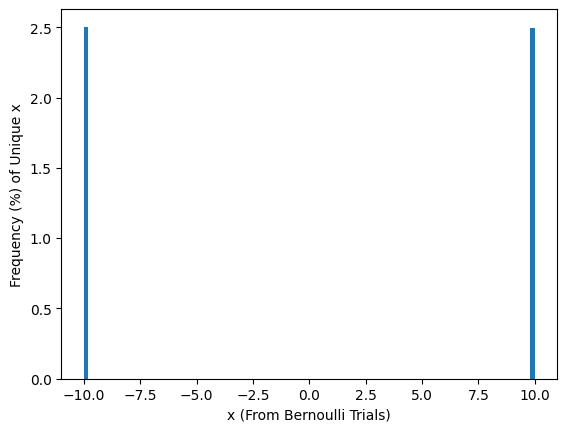

In [31]:
#Prints and plots
print(("The array of observations (1 row per experiment repeat):", observation))
print(("Frequency of ones  (1 row per experiment repeat):",np.sum(observation,axis=1)/v_numTrialsInAnExp))

fig1, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True)
histVal = ax1.hist(observation[0,:], bins=100, density=True)

print("The histogram values are:", histVal)

ax1.set_xscale("linear")

ax1.set_xlabel("x (From Bernoulli Trials)")
ax1.set_ylabel("Frequency (%) of Unique x")
fig1.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))

Frequentist performs an experiment that has two independent trials (repeats) of tossing a coin. We have two independent Bernoulli trials.
The outcome of the first trial is observation[1,1]
The outcome of the second trial is observation[1,2]

The Frequentist performs 4 repeats of the above.

In [32]:
v_numTrialsInAnExp = 2
v_numRepeats = 6
observation = aBernoulliExperiment(np.random.default_rng(1236), numTrialsInAnExp = v_numTrialsInAnExp, numRepeatsOfExp=v_numRepeats, profitLoss=[-1,1])

Frequency
(%) of
Unique x


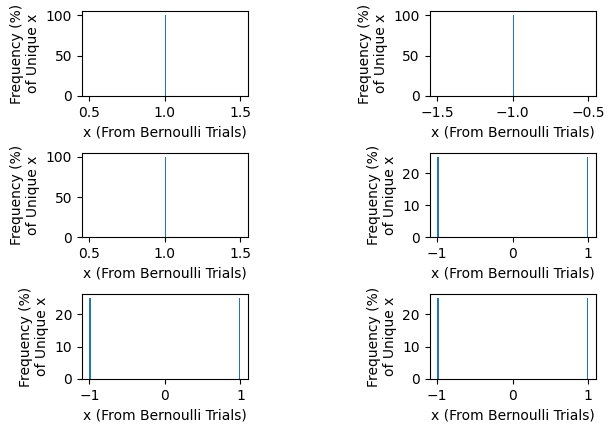

In [33]:
#Prints and plots
# print(("The array of observations (1 row per experiment repeat):", observation))
# print(("Frequency of ones  (1 row per experiment repeat):",np.sum(observation,axis=1)/v_numTrialsInAnExp))
# print("The histogram values are:", histVal)

fig, ax = plt.subplots(nrows=int(np.ceil(v_numRepeats/2)), ncols=2, sharex=False)

# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=2.0)

fig.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))
obsIdx = 0;
for rowidx in range(int(np.ceil(v_numRepeats/2))):
    for colidx in range(2):
        histVal = ax[rowidx][colidx].hist(observation[obsIdx,:], bins=100, density=True)
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("x (From Bernoulli Trials)")
        ax[rowidx][colidx].set_ylabel(textwrap.fill("Frequency (%) of Unique x", width = 15))
        obsIdx = obsIdx + 1
        if obsIdx >= v_numRepeats:
            rowidx = v_numRepeats
            colidx=2
            break

# plt.subplot_tool()
# plt.show(block=True)
print(textwrap.fill("Frequency (%) of Unique x", width = 10))